# 第十题
## 加载数据
经典的 Olivetti 人脸数据集包含 400 张灰度 64 × 64 像素的人脸图像。 每个图像都被展平为大小为 4,096 的一维向量。 拍摄了 40 个不同的人（每人 10 次），通常的任务是训练一个模型，该模型可以预测每张照片中代表的是哪个人。 使用 sklearn.datasets.fetch_olivetti_faces() 函数加载数据集。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_olivetti_faces
olivetti=fetch_olivetti_faces()

In [3]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [4]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

## 划分数据集
采用分层抽样。

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
strat_split=StratifiedShuffleSplit(n_splits=1,test_size=40,random_state=42)
# n_splits：是将训练数据分成train/test对的组数，可根据需要进行设置，默认为10

In [6]:
train_valid_idx,test_idx=next(strat_split.split(olivetti.data,olivetti.target))
# next() 返回迭代器的下一个项目。

In [7]:
X_train_valid=olivetti.data[train_valid_idx]
y_train_valid=olivetti.target[train_valid_idx]
X_test=olivetti.data[test_idx]
y_test=olivetti.target[test_idx]

In [8]:
strat_split=StratifiedShuffleSplit(n_splits=1,test_size=80,random_state=43)
train_idx,valid_idx=next(strat_split.split(X_train_valid,y_train_valid))

In [9]:
X_train=X_train_valid[train_idx]
y_train=y_train_valid[train_idx]
X_valid=X_train_valid[valid_idx]
y_valid=y_train_valid[valid_idx]

In [10]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


## 降维

In [11]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [12]:
pca=PCA(n_components=0.99)

In [13]:
X_train_pca=pca.fit_transform(X_train)
X_valid_pca=pca.transform(X_valid)
X_test_pca=pca.transform(X_test)

In [14]:
pca.n_components_

199

从4096降至199

## 模型训练

In [15]:
k_range=range(5,150,5)
kmeans_per_k=[] # 用于保存k值不同的模型

In [16]:
for k in k_range:
    print("k={}".format(k))
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


## 模型评估

In [18]:
from sklearn.metrics import silhouette_score
silhouette_scores=[silhouette_score(X_train_pca,model.labels_) for model in kmeans_per_k]

In [19]:
best_index=np.argmax(silhouette_scores)
best_k=k_range[best_index]
best_score=silhouette_scores[best_index]

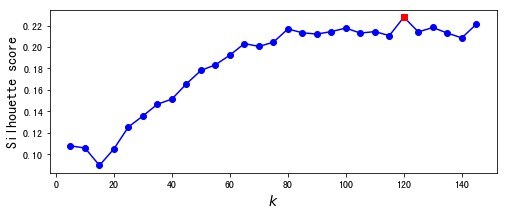

In [20]:
plt.figure(figsize=(8,3))
plt.plot(k_range,silhouette_scores,'bo-')
plt.xlabel("$k$",fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k,best_score,'rs')
plt.show()

看起来最好的聚类数相当高，为 120。您可能期望它是 40，因为图片上有 40 个不同的人。 然而，同一个人在不同的图片上可能看起来完全不同（例如，戴或不戴眼镜，或者只是向左或向右移动）。

In [21]:
inertias=[model.inertia_ for model in kmeans_per_k]
# 样本到其最近聚类中心的平方距离总和。
best_inertia=inertias[best_index]

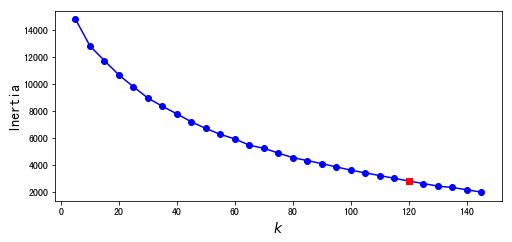

In [22]:
plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

这个惯性图上的最佳簇数不清楚，因为没有明显的肘部，所以我们坚持 k=100。

In [23]:
best_model=kmeans_per_k[best_index]

# 第十一题
## 模型训练

In [24]:
# 训练一个随机森林分类器
from sklearn.ensemble import RandomForestClassifier
rnd_clf=RandomForestClassifier(n_estimators=150,random_state=42)
rnd_clf.fit(X_train_pca,y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [25]:
rnd_clf.score(X_valid_pca,y_valid)

0.925

## 采用K-Means降维

In [26]:
X_train_reduced=best_model.transform(X_train_pca)
X_valid_reduced=best_model.transform(X_valid_pca)
X_test_reduced=best_model.transform(X_test_pca)

In [27]:
clf=RandomForestClassifier(n_estimators=150,random_state=42)
clf.fit(X_train_reduced,y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [28]:
clf.score(X_valid_reduced,y_valid)

0.7

哎呀！ 这根本不是更好！ 让我们看看调整集群数量是否有帮助。

*练习：搜索可以让分类器获得最佳性能的集群数量：你能达到什么性能？*

我们可以像之前在本笔记本中所做的那样使用 GridSearchCV，但是由于我们已经有了一个验证集，我们不需要 K 折交叉验证，而且我们只探索单个超参数，因此更简单 只需手动运行一个循环：

In [29]:
from sklearn.pipeline import Pipeline
for n_clusters in k_range:
    pipeline = Pipeline([("kmeans", KMeans(n_clusters=n_clusters, random_state=42)), (
        "forest_clf", RandomForestClassifier(n_estimators=150, random_state=42))])
    pipeline.fit(X_train_pca,y_train)
    print("n_clusters={}".format(n_clusters),pipeline.score(X_test_pca,y_test))

n_clusters=5 0.55
n_clusters=10 0.525
n_clusters=15 0.6
n_clusters=20 0.7
n_clusters=25 0.675
n_clusters=30 0.7
n_clusters=35 0.7
n_clusters=40 0.7
n_clusters=45 0.725
n_clusters=50 0.65
n_clusters=55 0.7
n_clusters=60 0.7
n_clusters=65 0.725
n_clusters=70 0.725
n_clusters=75 0.775
n_clusters=80 0.825
n_clusters=85 0.7
n_clusters=90 0.75
n_clusters=95 0.75
n_clusters=100 0.75
n_clusters=105 0.775
n_clusters=110 0.775
n_clusters=115 0.725
n_clusters=120 0.75
n_clusters=125 0.775
n_clusters=130 0.775
n_clusters=135 0.65
n_clusters=140 0.725
n_clusters=145 0.8


哦，好吧，即使通过调整集群的数量，我们也永远不会超过 80% 的准确率。 看起来到集群质心的距离不像原始图像那样提供信息。

In [30]:
X_train_extended=np.c_[X_train_pca,X_train_reduced]
X_valid_extended=np.c_[X_valid_pca,X_valid_reduced]
X_test_extended=np.c_[X_test_pca,X_test_reduced]

In [31]:
clf=RandomForestClassifier(n_estimators=150,random_state=42)
clf.fit(X_train_extended,y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [32]:
clf.score(X_valid_extended,y_valid)

0.8125

这有点好，但仍然比没有集群功能更糟糕。 在这种情况下，集群对于直接训练分类器没有用（但在标记新训练实例时它们仍然可以提供帮助）。